In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation
from astropy.io import fits
from spectral_cube import SpectralCube
from spectral_cube import BooleanArrayMask
from astropy.convolution import Gaussian1DKernel, convolve
import aplpy  
from astropy.wcs import WCS
from reproject import reproject_interp
from astroquery.vizier import Vizier
from astroquery.skyview import SkyView
from astropy.time import Time
import csv
from astropy.io import ascii
import pandas as pd
from astropy import units as u
from matplotlib.patches import Rectangle


Vizier.ROW_LIMIT = -1

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = '16'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
%matplotlib inline

<SkyCoord (ICRS): (ra, dec) in deg
    (200.5, -17.36666667)>


40
39
33
29


/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releas

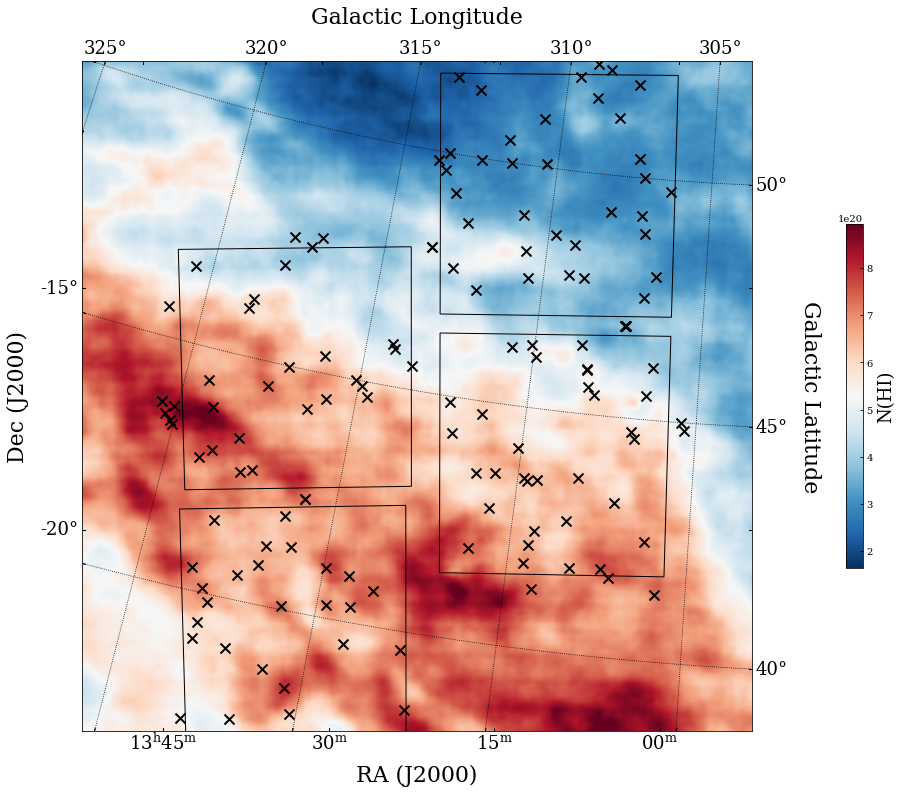

In [52]:
def plot_field(field, centre):

    # select continuum sources to plot

    coordinate = centre.replace(',', '')
    c = SkyCoord(coordinate, unit=(u.hourangle, u.deg))
    print(c)
    path_hi = SkyView.get_images(position=centre, width=14*u.deg, height=14*u.deg, survey=['HI4PI'], pixels=[1800,1800])
    hdulist_hi = path_hi[0]
    d = hdulist_hi[0].data
    h = hdulist_hi[0].header
    
    
    # plot figure
    fig = plt.figure(figsize=(14, 13))
    ax = fig.add_subplot(111, projection=WCS(h))

    # Display the moment map image
    im = ax.imshow(d, cmap='RdBu_r', vmax=np.percentile(d,99.9))
    #im = ax.imshow(d, cmap='bone_r', vmax=np.percentile(d,99.99))
    #ax.contour(co_reprojected, levels=[0.4, 0.8], cmap='Blues_r', alpha=0.7)

    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    

    #ax.scatter(ra_deg2, dec_deg2, transform=ax.get_transform('fk5'), marker='x', s=100, c='r', linewidths=3)
    
    fields = ['13:10:00 -13:09:04', '13:10:00 -18:32:52.53', '13:32:30 -16:45:00', '13:33:00 -22:08:48.53']
    
    for j in range(len(fields)):
        c1 = SkyCoord(fields[j], unit=(u.hourangle, u.deg))
        r = Rectangle((c1.ra.deg-2.5, c1.dec.deg-2.5), 5, 5, transform=ax.get_transform('fk5'), edgecolor='k', facecolor='none')
        ax.add_patch(r)
        
        result = Vizier(column_filters={"S1.4":">150"}).query_constraints(catalog='VIII/65/nvss',RAJ2000='>{} & <{}'.format(c1.ra.deg-3, c1.ra.deg+3), DEJ2000='>{} & <{}'.format(c1.dec.deg-3, c1.dec.deg+3), MajAxis='<45')
        print(len(result[0]))
        
        for i in range(0, len(result[0])): 
            c0 = SkyCoord(result[0]['RAJ2000'][i], result[0]['DEJ2000'][i], unit=(u.hourangle, u.deg))
            ax.scatter(c0.ra.deg, c0.dec.deg, transform=ax.get_transform('fk5'), marker='x', s=100, c='k', linewidths=2)

    #ax.set_title('Hydra', fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.coords['ra'].set_axislabel('RA (J2000)', fontsize=22)
    ax.coords['dec'].set_axislabel('Dec (J2000)', fontsize=22)

    cbar_hi = plt.colorbar(im, orientation='vertical', fraction=0.022, pad=0.12)
    cbar_hi.set_label('N(HI)', size=18)

    overlay = ax.get_coords_overlay('galactic')
    overlay.grid(color='k', ls='dotted')
    overlay[0].set_axislabel('Galactic Longitude', fontsize=22)
    overlay[1].set_axislabel('Galactic Latitude', fontsize=22)
    overlay[0].tick_params(axis='both', which='major', labelsize=18)
    overlay[1].tick_params(axis='both', which='major', labelsize=18)

    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

    #plt.colorbar(im)
    fig.savefig('{}_ASKAP.png'.format(field),dpi=200)
    
plot_field('NGC5044', '13:22:00, -17:22:00')


In [ ]:
'13:10:00, -13:09:04'
'13:10:00, -18:32:52.53'
'13:32:30, -16:45:00'
'13:33:00, -22:08:48.53'